In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    roc_auc_score,
    auc,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_balanced = pd.read_csv('customers_balancedd.csv')
df_balanced.head()

,Frequency,Monetary,Recency,Tenure,AOV,AvgUnitsPerOrder,ReturnRate,AvgGap,DiscountAmountRate,EngagementRate,Churn,Region_Central,Region_East,Region_South,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
0,0.375,0.180796,0.013734,0.961111,0.128833,0.255639,0.142857,0.179628,0.243626,0.005058,0,0,0,0,1,1,0,0
1,0.250,0.091895,0.330472,0.154861,0.091632,0.189474,0.200000,0.042223,0.252758,0.022422,1,1,0,0,0,1,0,0
2,0.125,0.094010,0.650644,0.304167,0.156568,0.245614,0.000000,0.170463,0.170230,0.006849,1,0,0,0,1,1,0,0
3,0.500,0.239143,0.025751,0.951389,0.132520,0.362573,0.000000,0.132954,0.298405,0.006569,0,0,0,0,1,1,0,0
4,0.250,0.121955,0.289270,0.479167,0.121701,0.210526,0.000000,0.133936,0.265295,0.007246,1,0,0,0,1,1,0,0


In [3]:
X = df_balanced.drop(['Churn'], axis=1, errors='ignore')
y = df_balanced['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [4]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',  
    random_state=42
)
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:,1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[27  1]
 [ 0 27]]

Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.964     0.982        28
           1      0.964     1.000     0.982        27

    accuracy                          0.982        55
   macro avg      0.982     0.982     0.982        55
weighted avg      0.982     0.982     0.982        55


ROC-AUC Score: 1.0


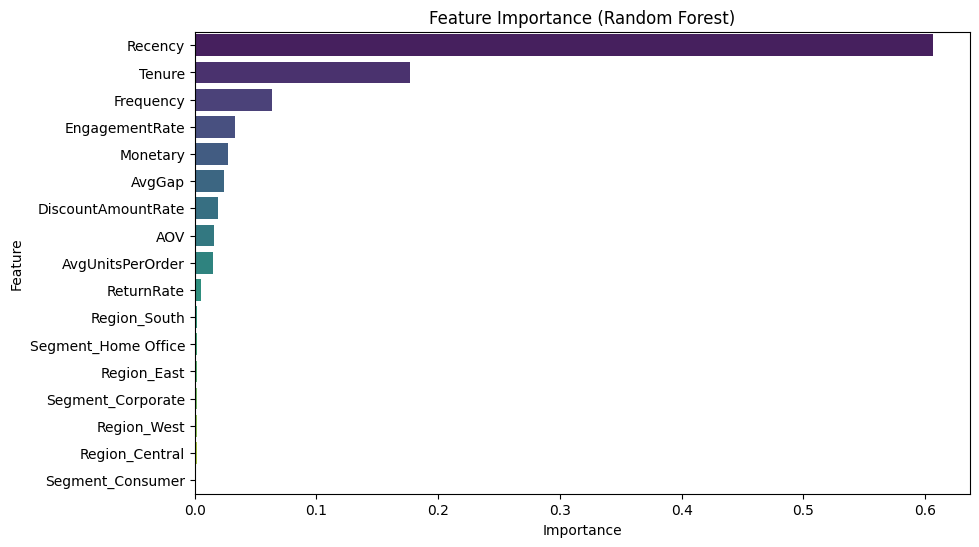

In [6]:
feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

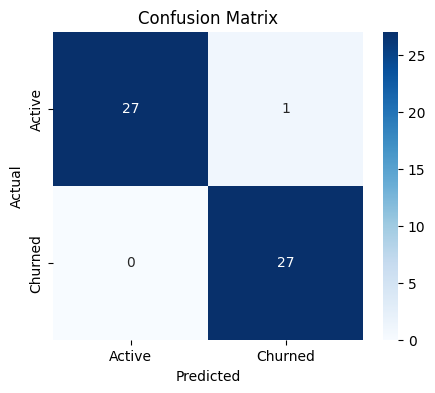

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Active','Churned'], yticklabels=['Active','Churned'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
sample_data = X_test.sample(10, random_state=42)
sample_labels = y_test.loc[sample_data.index]
preds = rf_model.predict(sample_data)
results = pd.DataFrame({
    'Actual': sample_labels,
    'Predicted': preds
})
print(results)

     Actual  Predicted
88        1          1
149       0          0
247       1          1
214       0          0
5         1          1
218       0          0
41        0          0
6         1          1
266       0          0
262       1          1


In [9]:
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Train Accuracy: 1.000
Test Accuracy: 0.982


In [10]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

CV Accuracy Scores: [1.         1.         1.         0.98181818 1.        ]
Mean CV Accuracy: 0.9963636363636365


In [11]:
import joblib
joblib.dump(rf_model, "churn_model.pkl")

['scaler.pkl']